# Project: Data Wrangling, Analysis, and Visualization
## Dataset: Twitter Archive: WeRateDogs

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing</a></li>
<li><a href="#issues">Issues Found with Data</a></li>

<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Storing Data & Exploratory Data Analysis (EDA)</a></li>
<li><a href="#limitations">Limitations</a></li>

</ul>

<a id='intro'></a>
## Introduction

##### There are **three datasets** to gather for this project.
1) An "Enhanced Archive" which contains some of the tweets of WeRateDogs Account, with some added information. This is already available enclosed in the folder accompanying this notebook.

2) An Image Predictions file to be downloaded programmatically. This file is the result of a dog-breed classifier model that classifies dog breeds in each tweet's images.

3) "Tweet_JSON" which is a dataset that will be created in this project, by querying the Twitter API to download all tweets of @rate_dogs account into a JSON file, and then load it into this notebook.

**The objective of the project is to:**
 - Gather this Data.
 - Assess it for Quality and Tidiness.
 - Clean it.
 - Analyze it.
 - Visualize and Communicate Findings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%matplotlib inline

<a id='gathering'></a>
## Data Gathering

Full Tweet Data from Twitter API - Code block below will query Twitter API for this data and save it as JSON dumped into .txt file.

Enhanced Archived Tweet Data Provided by Course.

Image Predictions Dataset - to be downloaded from Udacity servers and is .tsv format.


In [2]:
"""import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Keys below are hidden to comply with Twitter's Policy.

Bearer_Token = "HIDDEN"

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_df = pd.read_csv('twitter-archive-enhanced.csv') # We read-in the twitter archive
													   # We do this because we want to loop on the DataFrame to get the Tweet ID, to query the API using Tweepy

tweet_ids = tweet_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API
# For each Tweet ID, we get a JSON response back. Save that to .txt file, with every JSON response on a line of its own.
# We time this for-loop to understand how long it took, and have a dictionary that shows which Tweet IDs failed to return a valid response since some of them may have been deleted.
# The Try-Except Block is there so that when a query fails due to tweet being deleted or another reason, it does not interrupt the entire process.
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This for-loop will take 30 minutes because of Twitter's Rate Limit.
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass

end = timer()
print(end - start)
print(fails_dict)
"""

'import tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Keys below are hidden to comply with Twitter\'s Policy.\n\nBearer_Token = "AAAAAAAAAAAAAAAAAAAAAFW0NgEAAAAAR2VKFW5zWZ4qE4dMOa%2BxCJKrXaM%3D1FaPZLOFlruGPevthWjCNEJ7a8Ta57TXZejPLGDyC7mrFoneOW"\n\nconsumer_key = \'lNdhvNCjIZa27qtISIbnMorUE\'\nconsumer_secret = \'W0cv4AxLvltJt2woI9N7l8pyCAw9qWwg7DJ86jonSB3js0df0y\'\naccess_token = \'824273762778484736-ilay3CVb7TOC7JoI5NKRl7T4C2urJM9\'\naccess_secret = \'b4ao3oy0KDKkG8cvi6Mox47uqjjmj2T6Y0mdcMNxaYngv\'\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n\ntweet_df = pd.read_csv(\'twitter-archive-enhanced.csv\') # We read-in the twitter archive\n\t\t\t\t\t\t\t\t\t\t\t\t\t   # We do this because we want to loop on the DataFrame to get the Tweet ID, to query the API using Tweepy\n\ntweet_ids = tweet_df.tweet_id.values\nlen(t

In [3]:
# We load and display each of the files below in one cell
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
df_api = pd.read_json('tweet_json.txt', lines=True)
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

print('Image Predictions DataFrame Below')
display(df_predictions.head(2))

print('\n "Enhanced Archive of Tweets" DataFrame Below')
display(df_archive.head(2))

print('\n Data queried through Twitter API')
display(df_api.head(2))

Image Predictions DataFrame Below


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True



 "Enhanced Archive of Tweets" DataFrame Below


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None



 Data queried through Twitter API


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


<a id='assessing'></a>
## Assessing Data

In [4]:
print('Image Predictions - Info \n')
display(df_predictions.info())

print('"Enhanced Archive of Tweets" - Info \n')
display(df_archive.info())

print('\n Data queried through Twitter API - Info \n')
display(df_api.info())

Image Predictions - Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


None

"Enhanced Archive of Tweets" - Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 


None


 Data queried through Twitter API - Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float

None

### API Queried Dataset: Choosing Subset of Columns

We want Retweet Count and Favorite Count, and we also want the ID Column to identify these tweets.
A copy of the DataFrame is created in the cell below, with only the Features (columns) that we need.

In [5]:
df_api = df_api[['id','retweet_count','favorite_count']]
df_api.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,7340,34977


### Checking for duplicates and missing data

> We check for duplicates below and find no duplicates in any of the three datasets.
    We do however find missing values in one of them, the "Enhanced Archive" DataFrame.

In [6]:
print(df_predictions.duplicated().sum())
print(df_archive.duplicated().sum())
print(df_api.duplicated().sum())

0
0
0


In [7]:
print(df_predictions.isna().sum().sum(), " Missing Values found in Image Predictions DataFrame \n")
print(df_archive.isna().sum().sum(), " Missing Values found in Enhanced Archive DataFrame \n")
print(df_api.isna().sum().sum(), " Missing Values found in API Queried DataFrame \n")

0  Missing Values found in Image Predictions DataFrame 

11140  Missing Values found in Enhanced Archive DataFrame 

0  Missing Values found in API Queried DataFrame 



### Describe
> While these datasets are not strictly quantiative, we should have a look at their descriptive statistics for possible
    insights.

In [8]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [9]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
df_api.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2584.724153,7304.125697
std,6.823170e+16,4372.219769,11345.116255
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,524.500000,1264.500000
50%,7.182469e+17,1205.000000,3167.000000
75%,7.986692e+17,2993.000000,8931.500000
max,8.924206e+17,74178.000000,150339.000000


> In the Enhanced Archive dataset the numerator and denominator Minimums are at 0.0 which draws attention to that data. All the denominators should be 10.

In [11]:
df_archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [12]:
df_archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

<a id='intro'></a>
## Issues Found with Datasets
### Data was further inspected visually using Excel and the following issues were spotted:

### Inspecting for Quality
#### Image Predictions Table
    No issues found.
    

#### Enhanced Archive Table
    - We only want Original Ratings, no retweets or replies.
    - All denominators should be 10
    - Since all denominators should be 10, we can remove this column, and change 'rating_numerator' column to 'rating'.
    - Timestamps Data Type is 'Object' and should be converted to Pandas Date-Time Data Type Format.
    - Some of the names of dogs were erroneously extracted such as 'a', 'unacceptable', or 'infuriating'.
    - To make things simple, we should only take the columns that will be useful.
    - Dog nicknames columns have None, instead of NaN.
    - Ratings with decimal values are incorrectly extracted. RegEx might be helpful here.
    - ID Fields should be converted to strings. Numerical operations aren't supposed to be applicable to them.

#### API Queried Table
    No issues found.

### Inspecting for Tidiness (structure)
> All three tables should be merged into one DataFrame.

#### Image Predictions Table
    - For each dog, the top 3 predictions of their breed are there along with the True label of whether they actually are a dog or not. For dog predictions; of the ones that are correctly predicted as a dog, we keep the one with the highest confidence.

#### Enhanced Archive Table
    - Dog nicknames columns (floofer, doggo, pupper, puppo) should all be one column, as a Categorical Data Type.


#### API Queried Table

    - Source Column in Enhanced Archive Table, and API Queried Table is surrounded by tags. Tags can be removed using RegEx.

<a id='cleaning'></a>
## Cleaning Data
Create copies of the data before cleaning.

First step of Cleaning is to merge all three DataFrames into one.

In [13]:
df_predictions_c = df_predictions.copy()
df_archive_c = df_archive.copy()
df_api_c = df_api.copy()

### Merging DataFrames

In [14]:
df_clean = pd.merge(df_archive_c, df_predictions_c, how='inner', on='tweet_id')

df_clean = pd.merge(df_clean, df_api_c, how='inner', left_on='tweet_id', right_on='id')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

### Taking Original Tweets Only
> Keep only rows that have null data as a value under Retweet ID and Reply ID columns. Null value under these two columns signifies this is an original tweet.


In [15]:
print(df_clean.shape, "Shape Before")
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]
df_clean = df_clean[df_clean.in_reply_to_user_id.isnull()]
print(df_clean.shape, "Shape After")

(2059, 31) Shape Before
(1964, 31) Shape After


### Dropping Extra Columns

> We see numerous extra columns and drop them below to make it simpler to work with the data.

In [16]:
df_clean = df_clean.drop(columns=['in_reply_to_status_id',
                                  'in_reply_to_user_id',
                                  'retweeted_status_id',
                                  'retweeted_status_user_id',
                                  'retweeted_status_timestamp',
                                  'img_num',
                                  'expanded_urls',
                                 'jpg_url'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1964 non-null   int64  
 1   timestamp           1964 non-null   object 
 2   source              1964 non-null   object 
 3   text                1964 non-null   object 
 4   rating_numerator    1964 non-null   int64  
 5   rating_denominator  1964 non-null   int64  
 6   name                1964 non-null   object 
 7   doggo               1964 non-null   object 
 8   floofer             1964 non-null   object 
 9   pupper              1964 non-null   object 
 10  puppo               1964 non-null   object 
 11  p1                  1964 non-null   object 
 12  p1_conf             1964 non-null   float64
 13  p1_dog              1964 non-null   bool   
 14  p2                  1964 non-null   object 
 15  p2_conf             1964 non-null   float64
 16  p2_dog

### ID Fields converted to String

In [55]:
df_clean.tweet_id = df_clean.tweet_id.astype('string')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 2058
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1945 non-null   string        
 1   timestamp       1945 non-null   datetime64[ns]
 2   source          1945 non-null   object        
 3   text            1945 non-null   object        
 4   rating          1945 non-null   float64       
 5   name            1433 non-null   object        
 6   id              1945 non-null   int64         
 7   retweet_count   1945 non-null   int64         
 8   favorite_count  1945 non-null   int64         
 9   nickname        1945 non-null   object        
 10  breed           1643 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(4), string(1)
memory usage: 254.9+ KB


### Fixing Mistakes in Dog Names
> We see that all dogs with erroneously extracted names start with lowercase letters. And that some dogs have names as 'None'. We will change them all to 'None' and replace 'None' with NaN.

In [17]:
def dog_names(dog):
    if dog['name'][0].islower() == True:
        return 'None'
    else:
        return dog['name']

df_clean.apply(dog_names, axis=1)

df_clean.replace('None', np.nan, inplace=True)

In [18]:
list(df_clean['name'])

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 nan,
 'Jax',
 nan,
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 nan,
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 nan,
 nan,
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 nan,
 'Earl',
 'Lola',
 'Kevin',
 nan,
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 nan,
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 nan,
 'Bella',
 'Jesse',
 nan,
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 nan,
 'Cash',
 'Jed',
 nan,
 'Sebastian',
 nan,
 'Sierra',
 nan,
 nan,
 'Monkey',
 nan,
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 nan,
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',
 'Walter',
 nan,
 'Cooper',
 nan,
 'Harold',
 'Shikha',
 nan

### Ratings: Fixing Denominators and Numerators


#### Use RegEx to properly extract ratings with decimal values.

In [19]:
ratings = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df_clean.rating_numerator = ratings
df_clean.rating_numerator = df_clean.rating_numerator.astype('float')
df_clean.rating_numerator

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2054     5.0
2055     6.0
2056     9.0
2057     7.0
2058     8.0
Name: rating_numerator, Length: 1964, dtype: float64

In the cell below, we will check how many ratings have a denominator other than 10. All denominators should be 10 and other values should be dealt with.

In [20]:
(df_clean.rating_denominator != 10).sum()

17

In [21]:
# Drop all rows with denominators that are not equal to 10.
df_clean.drop(df_clean[df_clean.rating_denominator != 10].index, inplace=True)

# Testing
df_clean.rating_denominator.value_counts()

10    1947
Name: rating_denominator, dtype: int64

In [22]:
df_clean.rating_numerator.value_counts()

12.00      444
10.00      416
11.00      392
13.00      249
9.00       149
8.00        95
7.00        51
14.00       33
5.00        32
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
1776.00      1
9.75         1
0.00         1
13.50        1
11.26        1
11.27        1
420.00       1
Name: rating_numerator, dtype: int64

In [23]:
df_clean.drop(df_clean[df_clean.rating_numerator >= 15].index, inplace=True)
df_clean.rating_numerator.value_counts()

12.00    444
10.00    416
11.00    392
13.00    249
9.00     149
8.00      95
7.00      51
14.00     33
6.00      32
5.00      32
3.00      19
4.00      15
2.00       9
1.00       4
9.75       1
0.00       1
11.26      1
13.50      1
11.27      1
Name: rating_numerator, dtype: int64

Denominator Column is dropped below since the denominator should always be 10, and "rating_numerator" column is renamed to "rating".

In [24]:
df_clean = df_clean.drop(columns='rating_denominator') # Drop Denominator Column since all denominators should be 10.
df_clean = df_clean.rename(columns={'rating_numerator' : 'rating'}) # Rename Numerator Column to 'rating'.
df_clean.head(1)

,tweet_id,timestamp,source,text,rating,name,doggo,floofer,pupper,puppo,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,NaN,NaN,NaN,NaN,...,False,bagel,0.085851,False,banana,0.07611,False,892420643555336193,7340,34977


Strip out the extra "+0000" in the Timestamp features, and convert the datatype to Pandas Date-Time Format.

In [25]:
df_clean.timestamp = df_archive_c.timestamp.str.strip('+0000')
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)
df_clean.head(1)

,tweet_id,timestamp,source,text,rating,name,doggo,floofer,pupper,puppo,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,NaN,NaN,NaN,NaN,...,False,bagel,0.085851,False,banana,0.07611,False,892420643555336193,7340,34977


## RegEx to remove Tags

In [26]:
df_clean['source']

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2054    <a href="http://twitter.com/download/iphone" r...
2055    <a href="http://twitter.com/download/iphone" r...
2056    <a href="http://twitter.com/download/iphone" r...
2057    <a href="http://twitter.com/download/iphone" r...
2058    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 1945, dtype: object

In [27]:
import re

def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text['source'])


df_clean['source'] = df_clean.apply(remove_html_tags, axis=1)

In [28]:
# Test to check that Source column's HTML tags have been stripped.
df_clean['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2054    Twitter for iPhone
2055    Twitter for iPhone
2056    Twitter for iPhone
2057    Twitter for iPhone
2058    Twitter for iPhone
Name: source, Length: 1945, dtype: object

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1945 non-null   int64         
 1   timestamp       1945 non-null   datetime64[ns]
 2   source          1945 non-null   object        
 3   text            1945 non-null   object        
 4   rating          1945 non-null   float64       
 5   name            1433 non-null   object        
 6   doggo           72 non-null     object        
 7   floofer         8 non-null      object        
 8   pupper          209 non-null    object        
 9   puppo           23 non-null     object        
 10  p1              1945 non-null   object        
 11  p1_conf         1945 non-null   float64       
 12  p1_dog          1945 non-null   bool          
 13  p2              1945 non-null   object        
 14  p2_conf         1945 non-null   float64       
 15  p2_d

### Dog Stages Combined into one Categorical variable

There are cases where there are multiple dog stages in a row. In the cell below we find them.

In [30]:
df_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

df_clean.doggo.replace('None', '', inplace=True)
df_clean.doggo.replace(np.NaN, '', inplace=True)

df_clean.floofer.replace('None', '', inplace=True)
df_clean.floofer.replace(np.NaN, '', inplace=True)

df_clean.pupper.replace('None', '', inplace=True)
df_clean.pupper.replace(np.NaN, '', inplace=True)

df_clean.puppo.replace('None', '', inplace=True)
df_clean.puppo.replace(np.NaN, '', inplace=True)

In [31]:
df_clean['nickname'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean.loc[df_clean.nickname == 'doggopupper', 'nickname'] = 'doggo, pupper'
df_clean.loc[df_clean.nickname == 'doggopuppo', 'nickname'] = 'doggo, puppo'
df_clean.loc[df_clean.nickname == 'doggofloofer', 'nickname'] = 'doggo, floofer'

In [32]:
df_clean.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)
df_clean['nickname'].replace('None', np.NaN, inplace=True)
df_clean.nickname.value_counts()

                  1643
pupper             201
doggo               62
puppo               22
doggo, pupper        8
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: nickname, dtype: int64

### Dog Breed Predictions: Take Prediction with Highest Confidence

We can minimize the number of columns and take only the highest prediction.

The following function will do this.

In [33]:
def dog_breed(obs):
    if obs['p1_dog']:
        return obs['p1']
    elif obs['p2_dog']:
        return obs['p2']
    elif obs['p3_dog']:
        return obs['p3']
    else:
        return np.nan

df_clean['breed'] = df_clean.apply(dog_breed, axis=1)
# Drop the extra columns

df_clean = df_clean.drop(columns=['p1', 'p1_conf', 'p1_dog',
                                 'p2', 'p2_conf', 'p2_dog',
                                 'p3', 'p3_conf', 'p3_dog'])

df_clean.breed = df_clean['breed'].astype('category')

df_clean.head()

,tweet_id,timestamp,source,text,rating,name,id,retweet_count,favorite_count,nickname,breed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,892420643555336193,7340,34977,,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,Tilly,892177421306343426,5475,30287,,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,Archie,891815181378084864,3621,22786,,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,Darla,891689557279858688,7529,38245,,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,Franklin,891327558926688256,8109,36524,,basset


<a id='eda'></a>
# Storing, Analyzing, and Visualizing

In [34]:
df_clean.to_csv('twitter-archive-master.csv', index=False)

In [35]:
df2 = pd.read_csv('twitter-archive-master.csv')
df2.head(1)

,tweet_id,timestamp,source,text,rating,name,id,retweet_count,favorite_count,nickname,breed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,892420643555336193,7340,34977,NaN,NaN


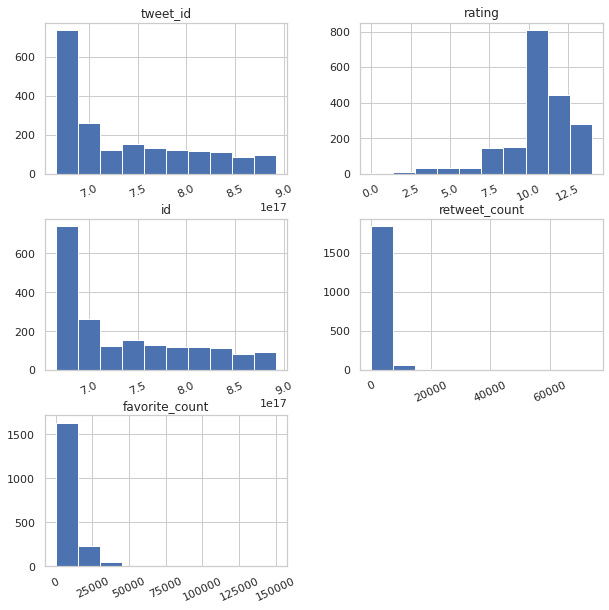

In [36]:
#df_clean.hist(figsize=(10,10), xrot=25);
sns.set(style="whitegrid", context="notebook", font='DeJavu Sans')
df_clean.hist(figsize=(10,10), xrot=25);

### Which dogs breeds were the most tweeted about?

In [37]:
df_clean['breed'].value_counts()[0:5]

golden_retriever      153
Labrador_retriever    101
Pembroke               94
Chihuahua              89
pug                    62
Name: breed, dtype: int64

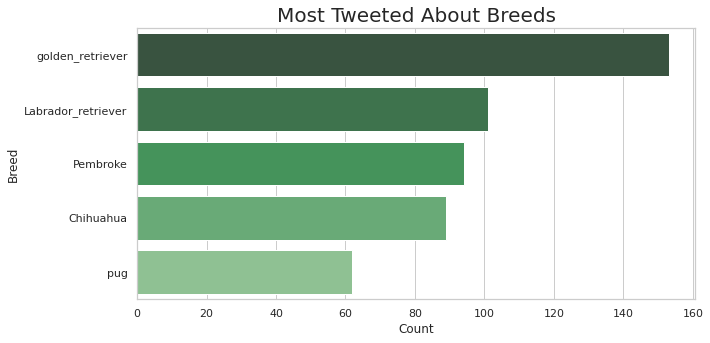

In [38]:
#pd.unique(df_clean['breed'])
plt.figure(figsize=(10,5))
#breed_count = df_clean.breed.value_counts()

sns.countplot(y='breed'[0:5], data=df_clean, palette='Greens_d', order=df_clean.breed.value_counts().iloc[0:5].index)
plt.title("Most Tweeted About Breeds", size=20)
plt.xlabel("Count")
plt.ylabel("Breed");

### What is the average rating for all dogs?

In [39]:
print("Averge rating for all dogs is {}".format(df_clean.rating.mean()))

Averge rating for all dogs is 10.536647814910024


### Which breed were the "Goodest" dogs, on average?

In [40]:
goodest_dogs = df_clean.groupby(['breed']).rating.mean()
goodest_dogs.sort_values(ascending=False)

breed
Bouvier_des_Flandres           13.000000
Saluki                         12.500000
briard                         12.333333
Tibetan_mastiff                12.250000
Border_terrier                 12.142857
                                 ...    
Tibetan_terrier                 9.250000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
soft-coated_wheaten_terrier     8.166667
Japanese_spaniel                5.000000
Name: rating, Length: 113, dtype: float64

### Which Breeds were the most retweeted?

#### On Average

In [41]:
df_clean.groupby(['breed']).retweet_count.mean().sort_values(ascending=False)

breed
Bedlington_terrier    7000.166667
Afghan_hound          4986.666667
standard_poodle       4680.000000
French_bulldog        4603.666667
English_springer      4588.800000
                         ...     
EntleBucher            586.000000
Tibetan_terrier        465.250000
Japanese_spaniel       378.000000
Brabancon_griffon      242.333333
groenendael            234.000000
Name: retweet_count, Length: 113, dtype: float64

#### In Total

In [42]:
df_clean.groupby(['breed']).retweet_count.sum().sort_values(ascending=False)

# Keep in mind that Golden Retrievers were also the most tweeted about. 
# The data is skewed due to the number of tweets for each breed being different.

breed
golden_retriever      483392
Labrador_retriever    326875
Pembroke              247279
Chihuahua             204210
Samoyed               162808
                       ...  
Brabancon_griffon        727
Irish_wolfhound          692
EntleBucher              586
groenendael              468
Japanese_spaniel         378
Name: retweet_count, Length: 113, dtype: int64

### How many Floofers, Doggos, Puppos and Puppers? 

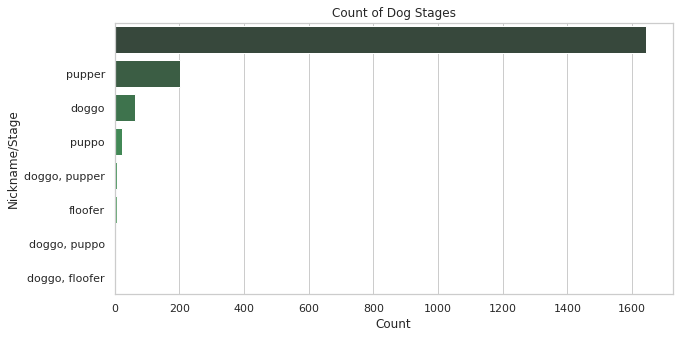

In [43]:
plt.figure(figsize=(10,5))
nickname_count = df_clean.nickname.value_counts()
sns.countplot(y='nickname', data=df_clean, palette='Greens_d', order=df_clean.nickname.value_counts().index)
plt.title("Count of Dog Stages")
plt.xlabel("Count")
plt.ylabel("Nickname/Stage");

In [50]:
df_clean.nickname.value_counts()

                  1643
pupper             201
doggo               62
puppo               22
doggo, pupper        8
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: nickname, dtype: int64

### What is the distribution of Ratings across the entire dataset?

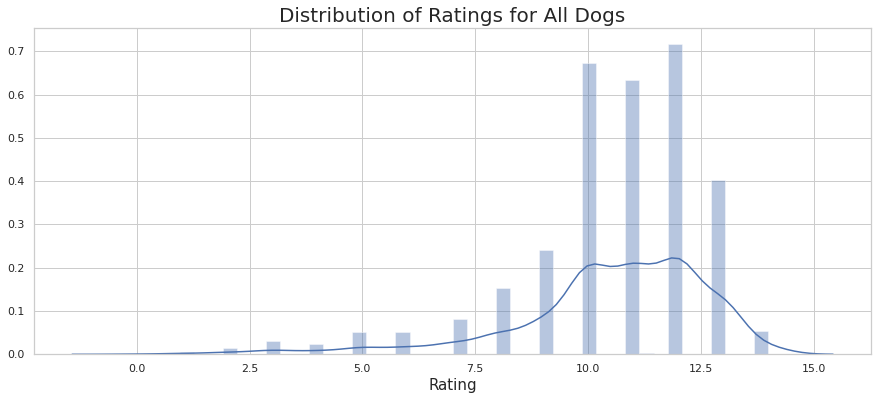

In [44]:
plt.figure(figsize=(15,6))
sns.distplot(df_clean.rating)
plt.title("Distribution of Ratings for All Dogs", size=20)
plt.xlabel("Rating", size=15);

### What is the distribution of Favorites and Retweets?

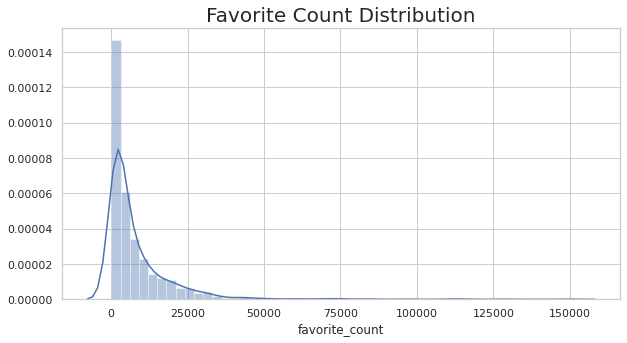

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(df_clean.favorite_count)
plt.title("Favorite Count Distribution", size=20);

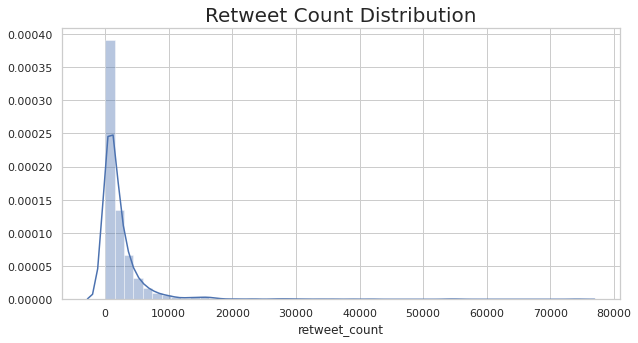

In [46]:
plt.figure(figsize=(10,5))
sns.distplot(df_clean.retweet_count)
plt.title("Retweet Count Distribution", size=20);

<Figure size 1080x576 with 0 Axes>

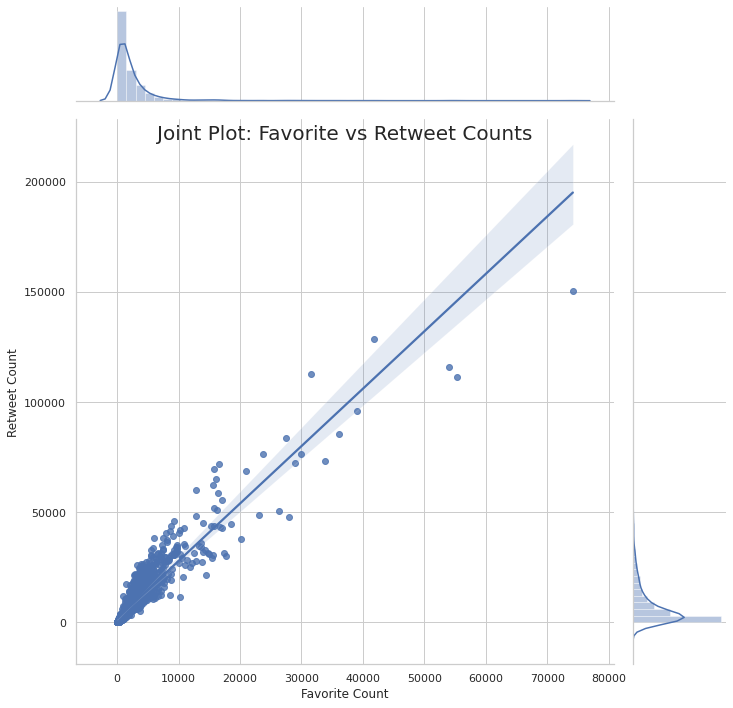

In [79]:
plt.figure(figsize=(15,8))
sns.jointplot(x=df_clean.retweet_count,y=df_clean.favorite_count, height=10, kind='reg')
plt.title("Joint Plot: Favorite vs Retweet Counts", size=20, loc='center', pad=-20)
plt.ylabel("Retweet Count")
plt.xlabel("Favorite Count");

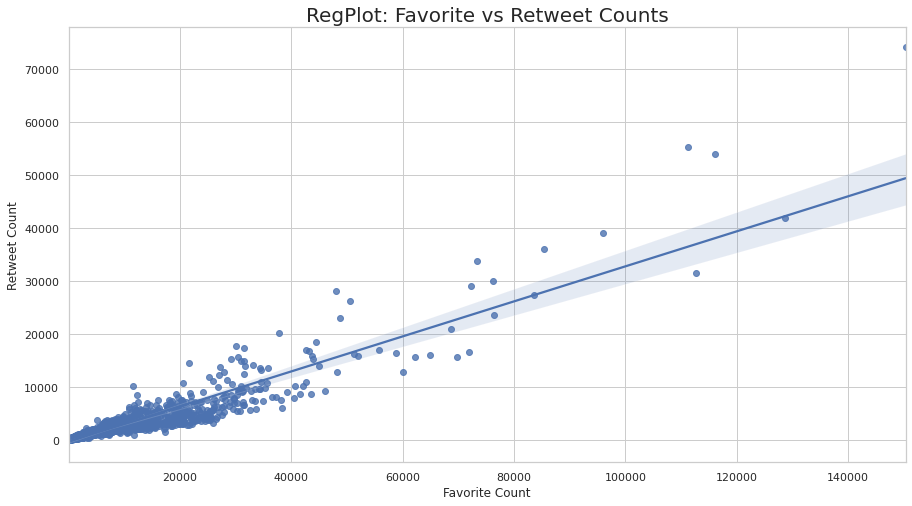

In [47]:
plt.figure(figsize=(15,8))
sns.regplot(x='favorite_count', y='retweet_count', data=df_clean)

### Boxplot of Dog Ratings, for each Nickname/Stage

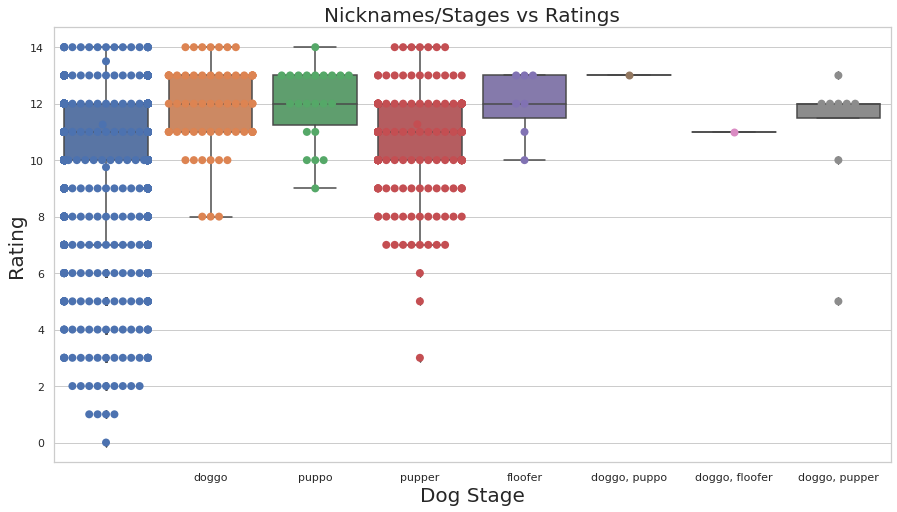

In [48]:
plt.figure(figsize=(15,8))

sns.swarmplot(x="nickname", y="rating", data=df_clean, size=8)
sns.boxplot(x="nickname", y="rating", data=df_clean)

plt.title("Nicknames/Stages vs Ratings", size=20)
plt.xlabel('Dog Stage', fontsize=20)
plt.ylabel('Rating', fontsize=20);

### Sources

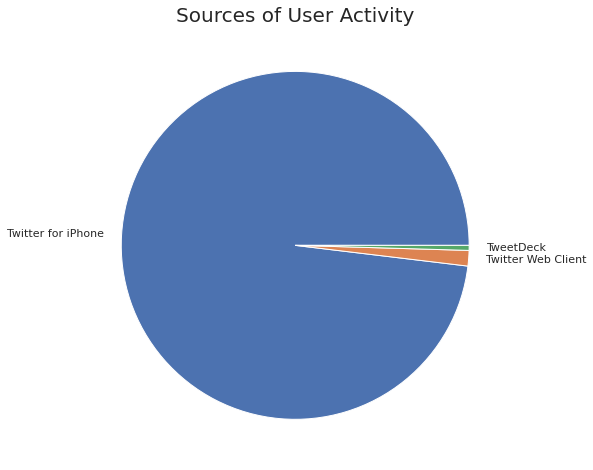

In [49]:
plt.figure(figsize=(15,8))
df_clean.source.value_counts().plot(kind='pie')
plt.title("Sources of User Activity", size=20)
plt.ylabel("");

<a id='limitations'></a>
## Limitations
The "Enhanced Twitter Archive Dataset" which contains the breeds of dogs, does not go beyond 2017. This extends beyond predicted breeds, to Dogs' Stages as well.